In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#read csv data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")


In [5]:
# Mouse ID column
mouse_drug_data["Mouse ID"].value_counts() 
clinical_trial_data["Mouse ID"].value_counts() 

g989    13
n304    10
r944    10
r554    10
a275    10
u196    10
l725    10
b559    10
a401    10
p438    10
o331    10
q633    10
o562    10
a262    10
x402    10
c766    10
j989    10
a644    10
s337    10
e662    10
l471    10
l733    10
y260    10
o287    10
c832    10
g288    10
w575    10
y865    10
i635    10
e227    10
        ..
v409     3
q119     3
a457     3
z314     2
n630     2
w678     2
y601     2
v339     2
w140     2
s619     2
f394     2
o813     2
h531     2
z234     2
c326     2
w746     2
m756     2
f278     2
v199     1
f932     1
h428     1
u153     1
x336     1
b447     1
o848     1
n482     1
x226     1
t573     1
l872     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [10]:
#locate  rows in the drug data
Drug = mouse_drug_data.loc[mouse_drug_data["Mouse ID"] == "g249", :]
Drug 

#locate the g989 rows in the clinical data
Trial = clinical_trial_data.loc[clinical_trial_data["Mouse ID"] == "g249", :]
Trial

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites


In [11]:

#remove g989 data from both data sets
clean_mouse_drug_data = mouse_drug_data.loc[mouse_drug_data["Mouse ID"] != "g249", :]
clean_clinical_trial_data = clinical_trial_data.loc[clinical_trial_data["Mouse ID"] != "g249", :]

#merge data tables
drugData = pd.merge(clean_mouse_drug_data, clean_clinical_trial_data, on="Mouse ID", how="outer")
drugData.head()




,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [9]:
#group data by drug and timepoint 
groupedDrugData = drugData.groupby(["Drug", "Timepoint"])

#find avg tumor volume and metastic sites for each drug at each timepoint
drugAvgs = groupedDrugData.mean()
drugAvgs.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [14]:
#list drugs to examine
drugList = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
#list timepoints
timepoints = np.arange(0, 50, 5)

#list tumor vol avg by drug and timepoint
tumorVolAvg = drugAvgs["Tumor Volume (mm3)"]
#separate tumor vol avg list by drug
capo_tumorVolAvg = tumorVolAvg.loc["Capomulin", :]
infu_tumorVolAvg = tumorVolAvg.loc["Infubinol", :]
keta_tumorVolAvg = tumorVolAvg.loc["Ketapril", :]
plac_tumorVolAvg = tumorVolAvg.loc["Placebo", :]



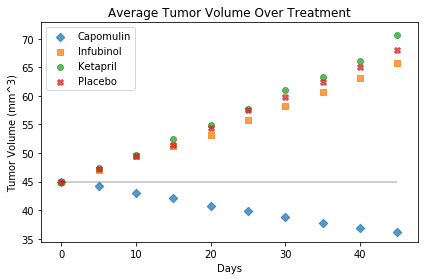

In [15]:
#plot each drug's tumor vol avg over time
capo_tumorVolAvgPlot = plt.scatter(timepoints, capo_tumorVolAvg, marker = "D", label = "Capomulin", alpha = .75)
infu_tumorVolAvgPlot = plt.scatter(timepoints, infu_tumorVolAvg, marker = "s", label = "Infubinol", alpha = .75)
keta_tumorVolAvgPlot = plt.scatter(timepoints, keta_tumorVolAvg, marker = "o", label = "Ketapril", alpha = .75)
plac_tumorVolAvgPlot = plt.scatter(timepoints, plac_tumorVolAvg, marker = "X", label = "Placebo", alpha = .75)

#formatting and titles
plt.hlines(45, 0, 45, alpha=0.25)
plt.title("Average Tumor Volume Over Treatment")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm^3)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [16]:
#find std errors for each drug and timepoint
tumorStdErrors = [stats.sem(drugData.loc[(drugData["Drug"] == drug) 
                                         & (drugData["Timepoint"] == time), "Tumor Volume (mm3)"]) 
                  for drug in drugList for time in timepoints]

#separate std errors by drug
capo_tumorStdErrors = [tumorStdErrors[i] for i in range(10)]
infu_tumorStdErrors = [tumorStdErrors[i] for i in range(10, 20)]
keta_tumorStdErrors = [tumorStdErrors[i] for i in range(20, 30)]
plac_tumorStdErrors = [tumorStdErrors[i] for i in range(30, 40)]

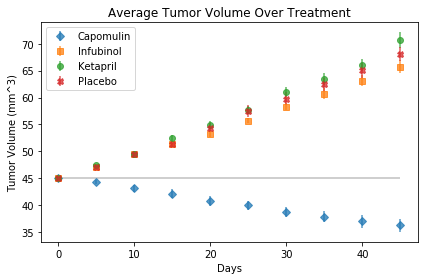

In [17]:


#plot tumor vol avg with std error bars
capo_tumorErrorPlot = plt.errorbar(timepoints, capo_tumorVolAvg, capo_tumorStdErrors, marker = "D", linestyle="None", label = "Capomulin", alpha = .75)
infu_tumorErrorPlot = plt.errorbar(timepoints, infu_tumorVolAvg, infu_tumorStdErrors, marker = "s", linestyle="None", label = "Infubinol", alpha = .75)
keta_tumorErrorPlot = plt.errorbar(timepoints, keta_tumorVolAvg, keta_tumorStdErrors, marker = "o", linestyle="None", label = "Ketapril", alpha = .75)
plac_tumorErrorPlot = plt.errorbar(timepoints, plac_tumorVolAvg, plac_tumorStdErrors, marker = "X", linestyle="None", label = "Placebo", alpha = .75)

#formatting and titles
plt.hlines(45, 0, 45, alpha=0.25)
plt.title("Average Tumor Volume Over Treatment")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm^3)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


## Metastatic Response to Treatment

In [18]:
#list metastatic sites avg by drug and timepoint 
metastaticAvg = drugAvgs["Metastatic Sites"]

#separate metastatic avg list by drug
capo_metastaticAvg = metastaticAvg.loc["Capomulin", :]
infu_metastaticAvg = metastaticAvg.loc["Infubinol", :]
keta_metastaticAvg = metastaticAvg.loc["Ketapril", :]
plac_metastaticAvg = metastaticAvg.loc["Placebo", :]


In [22]:
# Convert to DataFrame

# Preview DataFrame

metastaticAvg = pd.DataFrame(metastaticAvg)
metastaticAvg

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.260870
          10                 0.523810
          15                 0.809524
          20                 0.947368
          25                 1.166667
          30                 1.411765
          35                 1.533333
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

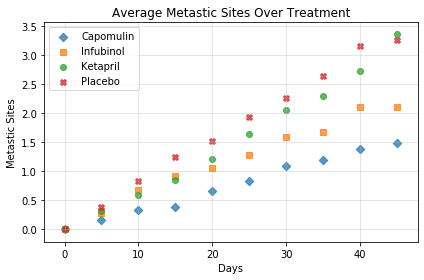

In [19]:
#plot metastatic avg over time
capo_metastaticAvgPlot = plt.scatter(timepoints, capo_metastaticAvg, marker = "D", label = "Capomulin", alpha = .75)
infu_metastaticAvgPlot = plt.scatter(timepoints, infu_metastaticAvg, marker = "s", label = "Infubinol", alpha = .75)
keta_metastaticAvgPlot = plt.scatter(timepoints, keta_metastaticAvg, marker = "o", label = "Ketapril", alpha = .75)
plac_metastaticAvgPlot = plt.scatter(timepoints, plac_metastaticAvg, marker = "X", label = "Placebo", alpha = .75)

#formatting and titles
plt.title("Average Metastic Sites Over Treatment")
plt.xlabel("Days")
plt.ylabel("Metastic Sites")
plt.legend(loc="best")
plt.grid(alpha = .4)
plt.tight_layout()
plt.show()

In [34]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

#find std errors for each drug and timepoint
# Convert to DataFrame
metastaticStdErrors= [stats.sem(drugData.loc[(drugData["Drug"] == drug) 
                                         & (drugData["Timepoint"] == time), "Metastatic Sites"]) 
                  for drug in drugList for time in timepoints]

#separate std errors by drug
capo_metastaticStdErrors = [metastaticStdErrors[i] for i in range(10)]
infu_metastaticStdErrors = [metastaticStdErrors[i] for i in range(10, 20)]
keta_metastaticStdErrors = [metastaticStdErrors[i] for i in range(20, 30)]
plac_metastaticStdErrors = [metastaticStdErrors[i] for i in range(30, 40)]

print(pd.DataFrame(metastaticStdErrors))

           0
0   0.000000
1   0.074833
2   0.125433
3   0.132048
4   0.161621
5   0.181818
6   0.172944
7   0.169496
8   0.175610
9   0.202591
10  0.000000
11  0.091652
12  0.159364
13  0.194015
14  0.234801
15  0.265753
16  0.227823
17  0.224733
18  0.314466
19  0.309320
20  0.000000
21  0.098100
22  0.142018
23  0.191381
24  0.236680
25  0.288275
26  0.347467
27  0.361418
28  0.315725
29  0.278722
30  0.000000
31  0.100947
32  0.115261
33  0.190221
34  0.234064
35  0.263888
36  0.300264
37  0.341412
38  0.297294
39  0.304240


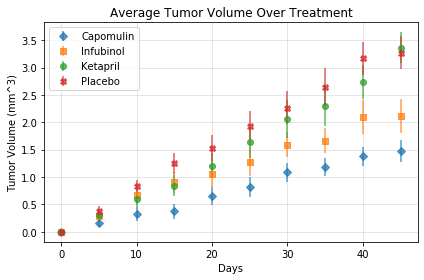

In [24]:


#plot metastatic avg with error bars
capo_metastaticErrorPlot = plt.errorbar(timepoints, capo_metastaticAvg, capo_metastaticStdErrors, marker = "D", linestyle="None", label = "Capomulin", alpha = .75)
infu_metastaticErrorPlot = plt.errorbar(timepoints, infu_metastaticAvg, infu_metastaticStdErrors, marker = "s", linestyle="None", label = "Infubinol", alpha = .75)
keta_metastaticErrorPlot = plt.errorbar(timepoints, keta_metastaticAvg, keta_metastaticStdErrors, marker = "o", linestyle="None", label = "Ketapril", alpha = .75)
plac_metastaticErrorPlot = plt.errorbar(timepoints, plac_metastaticAvg, plac_metastaticStdErrors, marker = "X", linestyle="None", label = "Placebo", alpha = .75)

#formatting and titles
plt.title("Average Tumor Volume Over Treatment")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm^3)")
plt.legend(loc="best")
plt.grid(alpha = .4)
plt.tight_layout()
plt.show()


# Preview DataFrame

## Survival Rates

In [35]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)


drugCounts = groupedDrugData.count()
mouseCounts = drugCounts["Mouse ID"]
# Convert to DataFrame

mouseCounts = pd.DataFrame(mouseCounts)
mouseCounts = mouseCounts.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
mouseCounts.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

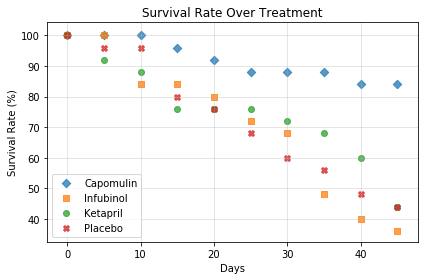

In [36]:
# Generate the Plot (Accounting for percentages)


#separate mouse count list by drug
capo_mouseCounts = mouseCounts.loc["Capomulin", :]
infu_mouseCounts = mouseCounts.loc["Infubinol", :]
keta_mouseCounts = mouseCounts.loc["Ketapril", :]
plac_mouseCounts = mouseCounts.loc["Placebo", :]

#convert mouse counts to % of starting mice
capo_survivalPerc = capo_mouseCounts / capo_mouseCounts.iloc[0, 0] * 100
infu_survivalPerc = infu_mouseCounts / infu_mouseCounts.iloc[0, 0] * 100
keta_survivalPerc = keta_mouseCounts / keta_mouseCounts.iloc[0, 0] * 100
plac_survivalPerc = plac_mouseCounts / plac_mouseCounts.iloc[0, 0] * 100

#plot each drug's mouse count over time
capo_tumorVolAvgPlot = plt.scatter(timepoints, capo_survivalPerc, marker = "D", label = "Capomulin", alpha = .75)
infu_tumorVolAvgPlot = plt.scatter(timepoints, infu_survivalPerc, marker = "s", label = "Infubinol", alpha = .75)
keta_tumorVolAvgPlot = plt.scatter(timepoints, keta_survivalPerc, marker = "o", label = "Ketapril", alpha = .75)
plac_tumorVolAvgPlot = plt.scatter(timepoints, plac_survivalPerc, marker = "X", label = "Placebo", alpha = .75)

#formatting and titles
plt.title("Survival Rate Over Treatment")
plt.xlabel("Days")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="best")
plt.grid(alpha = .4)
plt.tight_layout()
plt.show()
# Show the Figure
plt.show()
# Save the Figure

## Summary Bar Graph

In [37]:
# Calculate the percent changes for each drug

capo_tumorPercChange = (capo_tumorVolAvg[9] / capo_tumorVolAvg[0] * 100) - 100
infu_tumorPercChange = (infu_tumorVolAvg[9] / infu_tumorVolAvg[0] * 100) - 100
keta_tumorPercChange = (keta_tumorVolAvg[9] / keta_tumorVolAvg[0] * 100) - 100
plac_tumorPercChange = (plac_tumorVolAvg[9] / plac_tumorVolAvg[0] * 100) - 100


tumorPercList = [capo_tumorPercChange, infu_tumorPercChange, keta_tumorPercChange, plac_tumorPercChange]

#create table with drug and tumor % change
# Display the data to confirm
tumorPercTable = pd.DataFrame({"Drug": drugList, "Tumor Percent Change": tumorPercList})
tumorPercTable



,Drug,Tumor Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


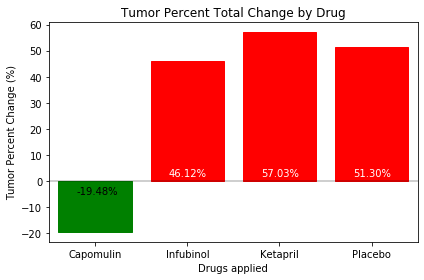

NameError: name 'fig' is not defined

In [40]:
# Store all Relevant Percent Changes into a Tuple



tumorBarChart = plt.bar(tumorPercTable["Drug"], tumorPercTable["Tumor Percent Change"])

# Splice the data between passing and failing drugs
# Use functions to label the percentages of changes


# Call functions to implement the function calls
for i in range(len(drugList)):
    if tumorPercList[i] < 0:
        tumorBarChart[i].set_color("green")
        percText = format(tumorPercList[i] / 100, ".2%")
        plt.text(-.2 + i, -5, percText)
    else:
        tumorBarChart[i].set_color("red")
        percText = format(tumorPercList[i] / 100, ".2%")
        plt.text(-.2 + i, 2, percText, color = "w")

# Orient widths. Add labels, tick marks, etc. 
plt.hlines(0, -.5, 3.5, alpha=0.25)
plt.xlim(-.5, 3.5)
plt.title("Tumor Percent Total Change by Drug")
plt.xlabel("Drugs applied")
plt.ylabel("Tumor Percent Change (%)")
plt.tight_layout()
plt.show()


# Show the Figure
fig.show()